In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Assignment A

In [2]:
n = 1000
tau = 100
sigmas = np.arange(1,201) 

In [3]:
sigmas #Check all the time that you initialize a variable that is doing the right thing

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [4]:
n_sigmas = len(sigmas)

In [5]:
#This will generate tau esplion_t (by row) for each value of sigma (by column)
epsilon = np.random.normal(0,sigmas,size=(tau,n_sigmas) )   

In [6]:
# According to the equation the last value is the sum by column, i.e. axis=0
X_last = epsilon.sum(axis=0) 

In [7]:
#This is the last value of X_t for each sigma. 
# We need to have 1000 of these arrays, so we need to use Tensors
X_last 

array([-7.48012408e+00,  1.66389621e+01, -3.23714320e+01,  9.70074419e+00,
       -5.96170250e+00, -2.69232569e+01, -3.80968693e+01,  7.25008610e+01,
       -3.75730393e+00,  1.04566983e+02,  2.10533224e+01,  1.81162823e+01,
       -4.04975391e+01, -4.80221352e+01,  9.60656606e+01, -1.72719107e+02,
        4.09256036e+02,  7.95832999e+00,  1.39641736e+02, -2.27209363e+02,
        1.57683130e+02,  1.06149493e+02, -1.08163147e+02, -4.21499105e+01,
        1.34198116e+02, -8.88448644e+00, -3.70628396e+01,  2.37017009e+02,
       -1.49894816e+02,  3.95391904e+01,  1.02261189e+02,  9.49118083e+01,
        2.71329364e+02, -6.87123956e+01, -1.04712918e+02,  2.52664012e+02,
        1.61296336e+02, -2.04985584e+02, -5.61727070e+02, -4.38862000e+01,
       -3.39783066e+02, -5.95874817e+01, -1.47147971e+02, -8.10911994e+02,
        7.25812151e+02,  1.15531155e+01, -2.93171192e+02, -1.03744446e+03,
       -5.95971443e+02, -5.91072156e+01, -7.86545765e+02, -9.95469574e+01,
       -2.47749528e+02,  

In [8]:
# We create a vector n where the elements are matrices tau x n_sigmas, i.e., a tensor
# There are diffent ways of doing that. It's possible that on other implementations,
# sigmas has to be a tensor n_sigmas x 1 x 1.

epsilon = np.random.normal(0,sigmas,size=( n ,tau, n_sigmas) ) 

In [9]:
#if you sum over axis=1 epsilon, you obtain X_tau
Xtau = epsilon.sum(axis=1)

In [10]:
# The size is n=1000 x n_sigmas=200. We don't have anymore tau=100. So it's correct
Xtau.shape

(1000, 200)

In [11]:
#If you some by column (axis=0) you'll remain with 200 elements (n_sigma=200)
SD_Xtau = Xtau.std(axis=0)

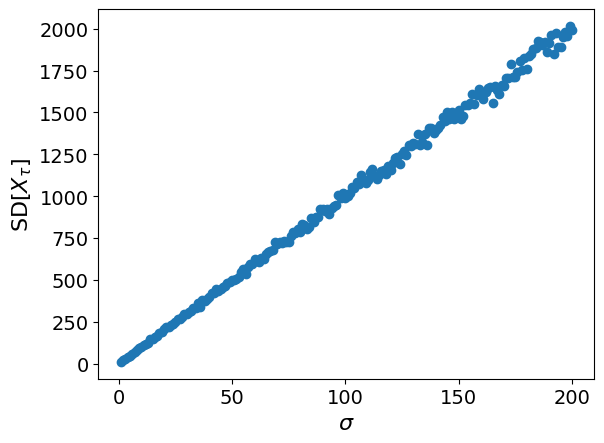

In [12]:
plt.plot(sigmas, SD_Xtau,'o')

plt.xlabel(r'$σ$',fontsize=16)
plt.ylabel(r'SD[$X_τ$]',fontsize=16)
plt.tick_params(labelsize=14)

In [13]:
# All the code can be compressed in a single line since we don't have any for-cycle. 

# Assignment B

In [14]:
# For this assigment you need all the random-walks. So you need a cumulative sum
# In NumPy is np.cumsum( x ), or x.cumsum() if x is a numpy array

In [15]:
# With the cumsum you'll remain with a tensor
X = epsilon.cumsum(axis=1)

In [16]:
X # Check it!

array([[[-1.12680294e+00, -4.03144222e-01, -8.88410587e-01, ...,
          1.94280507e+02,  1.25560428e+02,  2.02516059e+02],
        [-2.46814881e+00,  1.38279184e+00, -1.60804986e+00, ...,
          1.73218591e+02,  1.92244929e+02,  1.80175750e+02],
        [-4.16727881e+00, -4.48561307e-01,  7.74616906e-01, ...,
          2.98283486e+02,  6.06007710e+01,  2.66955995e+02],
        ...,
        [-9.43619821e+00, -2.81731298e-01,  2.04375048e+01, ...,
         -3.17478907e+02,  4.44393503e+02,  3.14177723e+01],
        [-1.05668960e+01,  8.40242094e-01,  1.94295436e+01, ...,
         -2.01515226e+02,  7.40705946e+02,  2.50971222e+02],
        [-9.54648726e+00, -2.72436656e-01,  2.44933852e+01, ...,
         -7.26212799e+01,  1.00954460e+03, -1.64136470e+01]],

       [[-3.91699544e-01, -6.43587288e-01, -1.81109508e+00, ...,
         -1.58217331e+02,  3.09514330e+02,  9.87404516e+01],
        [-1.41664822e+00, -2.01137529e+00, -5.58494470e+00, ...,
         -2.12017100e+02,  4.89571104e

In [17]:
X.shape # Check it

(1000, 100, 200)

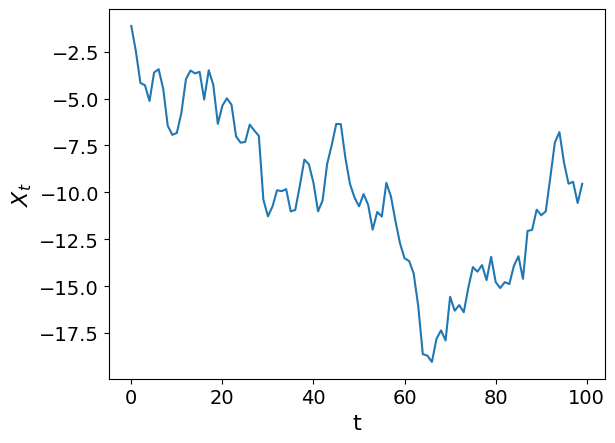

In [18]:
# This is a single random walk. Insepect all the time that you are doing correctly
plt.plot( X[0,:,0] ) # The time is on the central index


plt.xlabel(r't',fontsize=16)
plt.ylabel(r'$X_t$',fontsize=16)
plt.tick_params(labelsize=14)

In [19]:
# We need to find a way to compute the running maxima. Google: numpy running maximum
# https://stackoverflow.com/questions/7251421/running-maximum-of-numpy-array-values

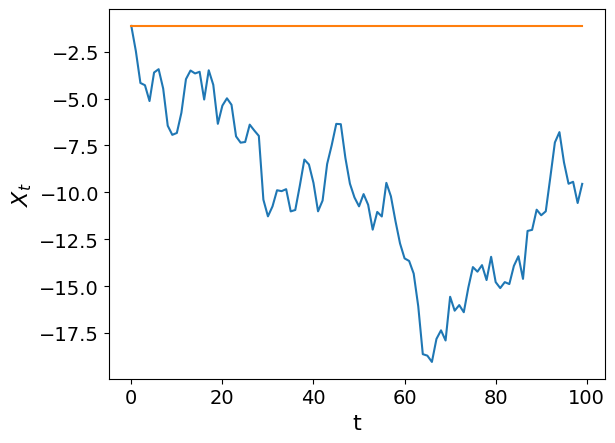

In [20]:
# Check that is doing the right thing
plt.plot( X[0,:,0] ) 
plt.plot( np.maximum.accumulate(X[0,:,0]) ) #running maxumum


plt.xlabel(r't',fontsize=16)
plt.ylabel(r'$X_t$',fontsize=16)
plt.tick_params(labelsize=14)

In [21]:
# We can vectorize on axis=1 (time)

M = np.maximum.accumulate(X,axis=1)


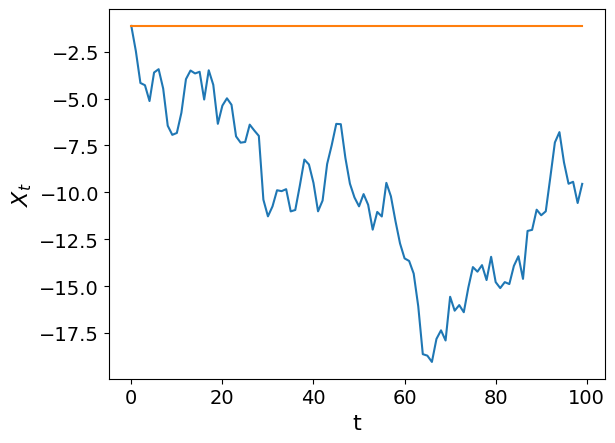

In [22]:
# Check it again!!
plt.plot( X[0,:,0] ) 
plt.plot( M[0,:,0]) #running maxumum


plt.xlabel(r't',fontsize=16)
plt.ylabel(r'$X_t$',fontsize=16)
plt.tick_params(labelsize=14)

In [23]:
# Normally, if I've to take a selection of unique values I'll use np.unique.
# The problem is that every time series might have different number of unique running maxima
# NumPy cannot handle objects where the number of columns (or rows) at not the sames for every row (or column)

In [24]:
# Finding that was more difficult, but finally in third position on Google, searching for:
# "number of unique element by column numpy" I found this
# https://stackoverflow.com/questions/48473056/number-of-unique-elements-per-row-in-a-numpy-array

def nunique(a, axis):
    return (np.diff(np.sort(a,axis=axis),axis=axis)!=0).sum(axis=axis)+1

# Probably is not the fastest way, it needs to sort it. 

In [25]:
U = nunique(M,1)

In [26]:
# But the running-maxima are sorted by definition, let's try to remove the sort
def nunique(a, axis):
    return (np.diff(a,axis=axis)!=0).sum(axis=axis)+1 


In [27]:
nunique(M,1)-U # It seems it works

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [28]:
# Ok all the elements are equal, so in our case the sort is useless
abs(nunique(M,1)-U).sum()

0

In [29]:
# We need to do the average over the axis=0
U.shape

(1000, 200)

In [30]:
Umean = U.mean(axis=0)

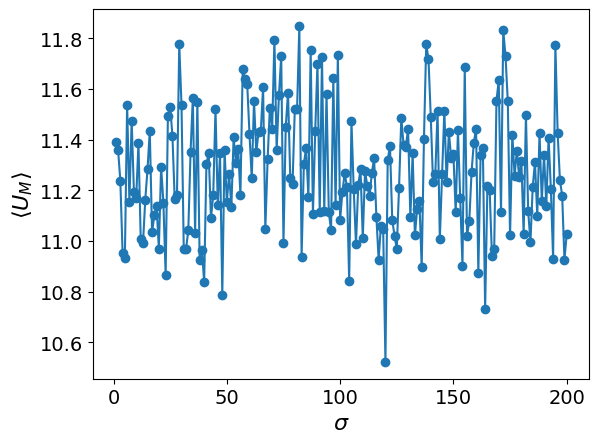

In [31]:
plt.plot(sigmas, Umean,'-o')

plt.xlabel(r'$σ$',fontsize=16)
plt.ylabel(r'$\langle U_M \rangle$',fontsize=16)
plt.tick_params(labelsize=14)